## Linear regression with Scikit-Learn

An open-source, commercially usable machine learning toolkit: [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms.

#### Goal
Utilize scikit-learn to implement linear regression using Gradient Descent




# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

from lab_utils_multi import  load_house_data
from lab_utils_common import dlc


In [3]:
# Loading dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

#Scale or normalization of training data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]


In [4]:
#Creation and fitting the model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 117, number of weight updates: 11584.0


In [5]:
#Parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.03423629 -20.9975126  -32.40212362 -38.0800302 ], b:[363.15384869]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [6]:
#Prediction
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.1638359  485.89461652 389.61804191 492.05696325]
Target values 
[300.  509.8 394.  540. ]


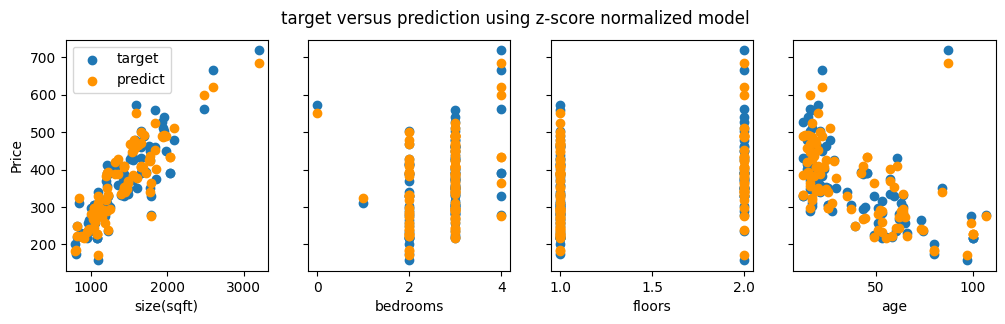

In [7]:
#Plt
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()